In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anshulsingh2102","key":"d43c97666d8757c1e7b1d57735730c48"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d gauravduttakiit/resume-dataset


Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0


In [5]:
!unzip resume-dataset.zip


Archive:  resume-dataset.zip
  inflating: UpdatedResumeDataSet.csv  


In [6]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [7]:
df.shape

(962, 2)

In [8]:
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
df.columns


Index(['Category', 'Resume'], dtype='object')

In [10]:
print(df['Category'].iloc[400])

Java Developer


In [11]:
print(df['Resume'].iloc[400])


TECHNICAL SKILLS Programming Languages: Java (Servlet, JSP, Spring Boot). Web Technology: HTML5, CSS3, Bootstrap, JavaScript, JQuery, Ajax, AngularJs. Database: MySQL. IDE and Tool: Eclipse, spring tool Suit, Net beans, Sublime Text, Atom. Operating System: Windows XP, 7, 8, 10. ACHIEVEMENT â¢ Java Developer Certificate from Unanth Technical Institute. â¢ Java Certificate from solo Learn. â¢ Command line crash Course certificate from Udemy. JOB DETAILS Education Details 
January 2018 M.C.A  Pune, Maharashtra Pune University
January 2015 B.C.A  Amravati, Maharashtra Amravati University
January 2012 H.S.C  Amravati, Maharashtra Amravati University
January 2010 S.S.C  Amravati, Maharashtra Amravati University
Java developer 

Full Stack Java Developer
Skill Details 
Css- Exprience - Less than 1 year months
Ajax- Exprience - Less than 1 year months
Servlet- Exprience - Less than 1 year months
Html5- Exprience - Less than 1 year months
Spring- Exprience - Less than 1 year months
Java- Ex

In [12]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


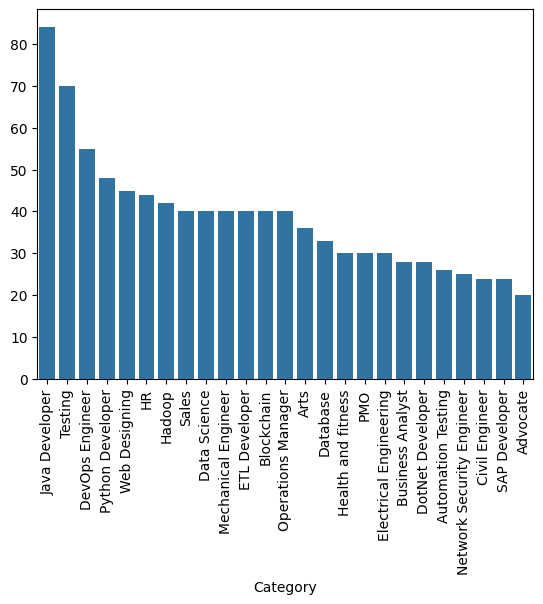

In [13]:
sns.barplot(
    x=df['Category'].value_counts().index,
    y=df['Category'].value_counts().values,
    #data=df
    )
plt.xticks(rotation=90)
plt.show()

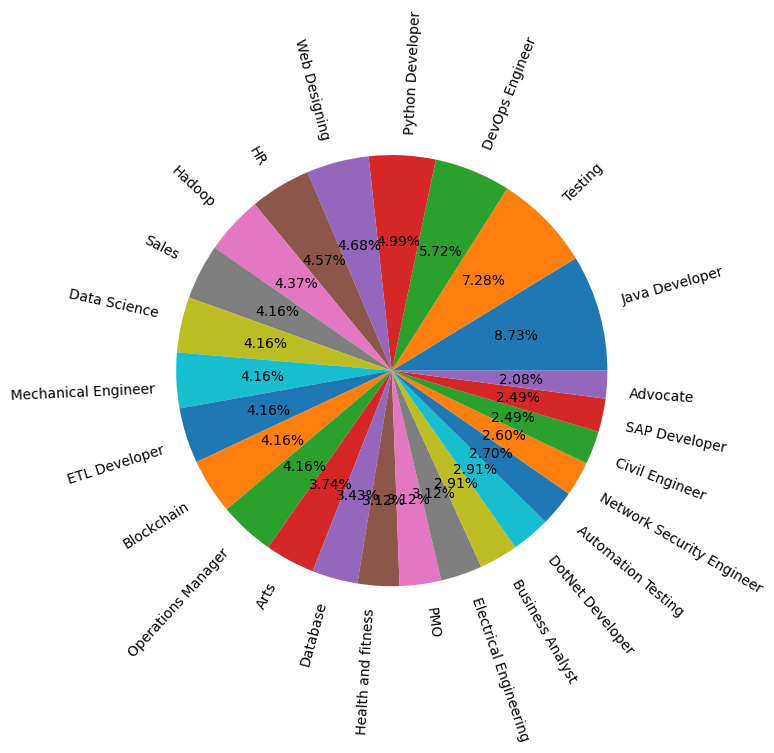

In [14]:
plt.figure(figsize=(7,7))
plt.pie(
    labels=df['Category'].value_counts().index,
    x=df['Category'].value_counts().values,data=df,
    autopct='%.2f%%',
    rotatelabels=90)
plt.show()

In [15]:
df['Resume'].iloc[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [16]:
!pip install purifytext

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.1 MB/s eta 0:00:00
  Created wheel for purifytext: filename=purifytext-0.1.0-py3-none-any.whl size=4853 sha256=f7755ab75d4e4f6694c7558a33fef8cba39d0e0f154b5572e8a99b1379b3b318
  Stored in directory: /root/.cache/pip/wheels/4c/76/d6/789f85d2ca69c4ecb077c530b2834b3279dc28e8962c0febcd
Successfully built purifytext


In [17]:
from purifytext import clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [18]:
df.isnull().sum()

,0
Category,0
Resume,0


In [19]:
df=clean_text(dataframe=df,column_name='Resume')



=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️

⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Punctuation ⬇️

⬇️ Removing Special Characters ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

⬇️ Expanding Contractions ⬇️

⬇️ Removing Stopwords ⬇️

⬇️ Lemmatizing Words ⬇️

=== Cleaning Completed ===



In [20]:
df["Resume"].iloc[0]

'skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch dj dcjs plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerating review process run analytics generate report core me

In [21]:
df.head(5)

,Category,Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may may uitrgpv data scientis...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...


In [22]:
df.iloc[0]


,0
Category,Data Science
Resume,skill programming language python panda numpy ...


In [23]:
CORPUS = np.array(df['Resume'])
type(CORPUS)

numpy.ndarray

In [24]:
y=df['Category']

In [25]:
label_encoder = LabelEncoder()

In [26]:
y = label_encoder.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    CORPUS, y, test_size=0.2, random_state=42
)


In [28]:
pipeline_lr=Pipeline(steps=[("vectorizer", TfidfVectorizer()), ("model", LogisticRegression())])
tfidf_vectorizer = pipeline_lr.named_steps['vectorizer']


In [29]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [30]:
y_train_pred = pipeline_lr.predict(X_train)
y_test_pred = pipeline_lr.predict(X_test)

# Training Report
print("Training Report")
print("Logistic Regression Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Testing Report
print("\nTest Report")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Report
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        25
           8       1.00      0.98      0.99        41
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        69
          16       1.0

In [31]:
from sklearn.metrics import accuracy_score


In [32]:
# Training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 0.99


In [33]:
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

In [34]:
def prediction(resume):
    resume_df = pd.DataFrame([resume], columns=["Resume"])
    clean_df = clean_text(dataframe=resume_df, column_name="Resume")
    CORPUS = np.array(clean_df["Resume"])
    pred = pipeline_lr.predict(CORPUS)
    return label_encoder.inverse_transform(pred)[0]

In [35]:
resume=df['Resume'].sample().iloc[0]

In [36]:
print(resume)

software skill language c c java operating system window xp ubuntu rdbms oracle sql database sql postgresql markup scripting html javascript php cs jquery angular j framework strut hibernate spring mvc web server tomcat glassfish web service rest soap training detail duration month united telecommunication limited jharnet project place ranchi jharkhand networking requirement elementary configuration router switch ip mac addressing lease line osi layer routing protocol status network designereducation detail high school diploma government woman ranchi jharkhand institution blockchain engineer blockchain engineer auxledger skill detail java exprience month cs exprience month html exprience month javascript exprience month c exprience monthscompany detail company auxledger description worked lot product blockchain bitcoin build wallet explorer bitcoin ethereum build wallet explorer ethereum blockchain customize product ethereum inventory system build smart contract solidity deployed java 

In [37]:
prediction(resume)


=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️

⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Punctuation ⬇️

⬇️ Removing Special Characters ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

⬇️ Expanding Contractions ⬇️

⬇️ Removing Stopwords ⬇️

⬇️ Lemmatizing Words ⬇️

=== Cleaning Completed ===



'Blockchain'

In [38]:
resume=df['Resume'].sample().iloc[0]

In [39]:
print(resume)


education detail may diploma nutrition education bengaluru karnataka ignou university june bachelor science clinical nutrition dietetics bengaluru karnataka smt vhd institute homescience health wellness coach advance pg diploma clinical research clinical data management sa skill detail company detail company goqii technology ltd description motivate player ie goqii subscriber make permanent shift healthier lifestyle enhance health nutrition karma track analyse player lifestyle fitness data captured goqii band design custom wellnessfitness goal mutually player coach meeting goal interact goqii player daily basis via goqii app textaudio company description via health marketing innovation viamedia health jointly organized national campaign maternal nutrition evaluation glaxosmithklineconsumer healthcare conduct maternal nutritional counselling camp practicing gynaecologist different hospitalsclinics allotted medical representative conveying importance every nutrient required time food con

In [40]:
prediction(resume)


=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️

⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Punctuation ⬇️

⬇️ Removing Special Characters ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

⬇️ Expanding Contractions ⬇️

⬇️ Removing Stopwords ⬇️

⬇️ Lemmatizing Words ⬇️

=== Cleaning Completed ===



'Health and fitness'

In [41]:
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline_lr, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
